## <CENTER><U> 1. IMPORTING BASIC NECESSARY PACKAGES</U></CENTER>

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## <CENTER><U> 2. READING INPUT DATA </CENTER></U>

In [2]:
data = pd.read_excel("Data processing/feature_extracted.xlsx")
features = ['Max Speed(m/s)', 'Non 0 Mean Speed(m/s)', 'Speed Std', 'Max Acceleration(m/s^2)',
            'Acceleration Std', 'Non 0 Mean Acceleration(m/s^2)']

## <CENTER><U> 3. MODELING </CENTER></U>

## <b>Train, test split

In [3]:
X= data[features]
y = data['Transportation Mode']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=233)

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## <b>K-fold validation

In [5]:
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=233)

## Cross-Validation

In [6]:
# Let's start the prediction
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn import model_selection
from time import time
from sklearn import model_selection as cross_validation
from sklearn.model_selection import cross_val_score, cross_val_predict
# Let's keep 20 % of the data for testing purposes
test_size = .20
random_state = 233
X_train_clus, X_test_clus, y_train_clus, y_test_clus = cross_validation.train_test_split(
    X, y, test_size = test_size, random_state = random_state, stratify=y)
clf_dict_clus = {}
clf_report_clus = []
clf_feature_relevance_clus = []
clf_clus = DecisionTreeClassifier()
clf_name = clf_clus.__class__.__name__
print ("Training", clf_name, "...")
# Fit model on training data
clf_dict_clus[clf_name] = clf_clus.fit(X_train_clus, y_train_clus)
# Predict based on it
# y_pred = clf.predict(X_train)    
# Perform cross validation
start = time()
scores = cross_validation.cross_val_score(clf_clus, X_train_clus, y_train_clus, cv=5, scoring='accuracy') 
end = time()
duration = end-start
print ("Average CV performance for {} : {:.6} (in {:.6} seconds)".format(clf_name, scores.mean(), duration))
clf_report_clus.append([clf_name, scores.mean(), duration])
# Store information in list for better visibility
clf_report_clus = pd.DataFrame(clf_report_clus, columns=['classifier', 'Cluster_train_accuracy', 'Cluster_train_time'])

Training DecisionTreeClassifier ...
Average CV performance for DecisionTreeClassifier : 0.751996 (in 0.0778902 seconds)


X = data.drop(['Transportation Mode'],axis=1)
#X= data[features]
y = data['Transportation Mode']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=233)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## <b>K-fold validation

n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=233)

## <b>Model learning curve

In [7]:
def plot_learning_curve(estimator, title, X, y, ylim=(0.5, 1.01), cv=skf, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='f1_weighted')
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='f1_weighted')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    print("DT Macro weighted F1-score: %.2f%%" % (train_scores_mean[-1] * 100.0))
    print("DT Macro weighted F1-score: %.2f%%" % (test_scores_mean[-1] * 100.0))
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

## Model Learning Curve

DT Macro weighted F1-score: 100.00%
DT Macro weighted F1-score: 75.45%


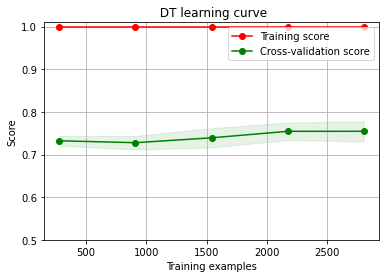

In [8]:
clf = DecisionTreeClassifier()
plot_learning_curve(clf, u" DT learning curve", X_train, y_train)
plt.show()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

test_accuracy = precision_score(y_test, y_pred, average='weighted')

#print("SVM Macro weighted F1-score: %.2f%%" % (test_accuracy*100.0))

## Classification Report 

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    airplane       0.20      0.25      0.22         4
        bike       0.81      0.74      0.78       200
        boat       0.00      0.00      0.00         1
         bus       0.68      0.67      0.68       339
         car       0.62      0.65      0.63       176
  motorcycle       1.00      1.00      1.00         1
         run       0.00      0.00      0.00         1
      subway       0.56      0.61      0.58       114
        taxi       0.14      0.17      0.15        53
       train       0.43      0.38      0.40        16
        walk       0.92      0.91      0.91       597

    accuracy                           0.75      1502
   macro avg       0.49      0.49      0.49      1502
weighted avg       0.75      0.75      0.75      1502



## confusion matrix

In [10]:
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[  1,   0,   0,   2,   0,   0,   0,   0,   0,   1,   0],
       [  0, 149,   0,  18,   3,   0,   0,   3,   4,   1,  22],
       [  0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  1,  12,   0, 228,  34,   0,   0,  28,  23,   2,  11],
       [  0,   0,   0,  33, 114,   0,   0,  12,  14,   2,   1],
       [  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1],
       [  3,   1,   0,  12,   9,   0,   0,  70,  11,   0,   8],
       [  0,   0,   0,  15,  21,   0,   0,   4,   9,   2,   2],
       [  0,   0,   0,   3,   2,   0,   0,   1,   2,   6,   2],
       [  0,  22,   0,  21,   1,   0,   0,   8,   3,   0, 542]],
      dtype=int64)

## Confusion Matrix

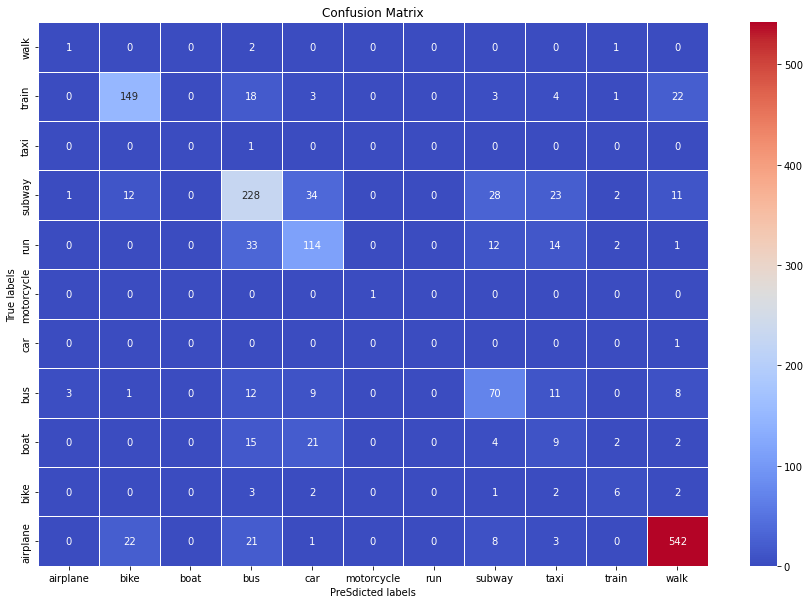

In [11]:
plt.figure(figsize = (15,10))
ax= sns.heatmap(cf_matrix, cmap='coolwarm',annot= True, linewidth= 1, fmt = "d" )
# labels, title and ticks
ax.set_xlabel('PreSdicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['airplane','bike','boat','bus','car','motorcycle','run','subway','taxi','train','walk']); ax.yaxis.set_ticklabels(['walk','train','taxi','subway','run','motorcycle','car','bus','boat','bike','airplane']);